In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_path = "/content/drive/MyDrive/ds_frutas_am/train"
test_path = "/content/drive/MyDrive/ds_frutas_am/test"

In [4]:
# Preprocessing
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [5]:
train_set = train_gen.flow_from_directory(train_path, target_size=(64, 64), batch_size=8, class_mode='categorical', shuffle=True)
test_set = test_gen.flow_from_directory(test_path, target_size=(64, 64), batch_size=8, class_mode='categorical', shuffle=False)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [22]:
class_names = list(train_set.class_indices.keys())

In [23]:
images, labels = next(train_set)

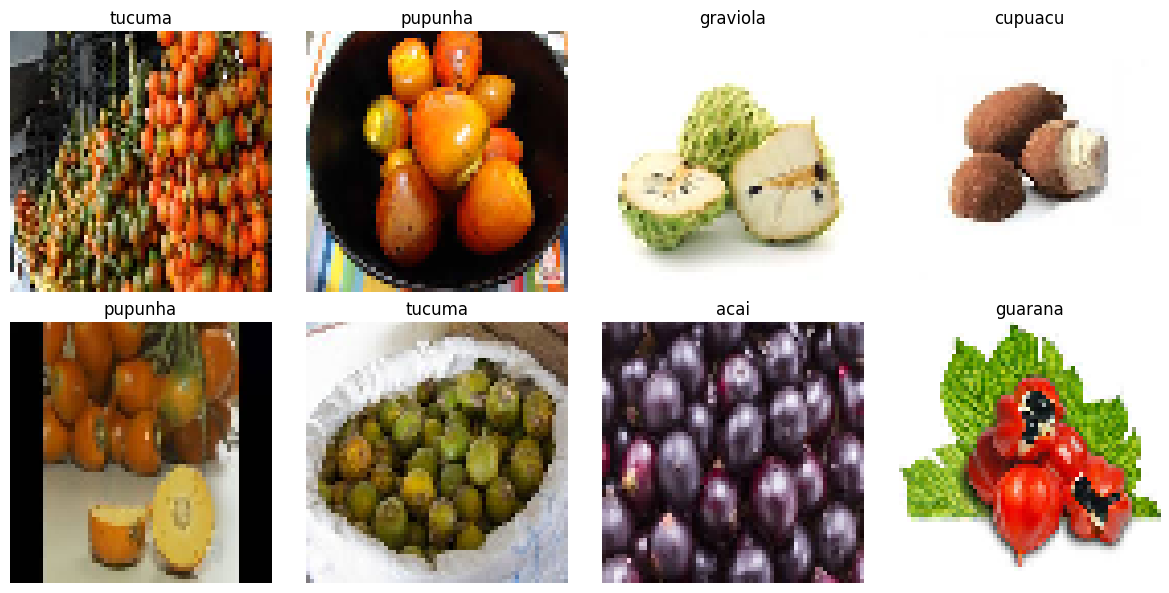

In [27]:
plt.figure(figsize=(12, 6))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_set, epochs=20, validation_data=test_set)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.1166 - loss: 1.9566 - val_accuracy: 0.2000 - val_loss: 1.7069
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4482 - loss: 1.6136 - val_accuracy: 0.3667 - val_loss: 1.5224
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4607 - loss: 1.3496 - val_accuracy: 0.5000 - val_loss: 1.2699
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.6731 - loss: 0.9461 - val_accuracy: 0.5333 - val_loss: 1.0746
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.6270 - loss: 0.9534 - val_accuracy: 0.4333 - val_loss: 1.3449
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.7277 - loss: 0.6978 - val_accuracy: 0.6000 - val_loss: 1.0608
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8441 - loss: 0.5012 - val_accuracy: 0.7333 - val_loss: 0.7487
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.9580 - loss: 0.2293 - val_accuracy: 0.7000

In [11]:
# Save model
model.save("CNN.h5")

In [12]:
# Save model
model.save("CNN.keras")

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,877,780 (18.61 MB)

 Trainable params: 1,625,926 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,251,854 (12.40 MB)

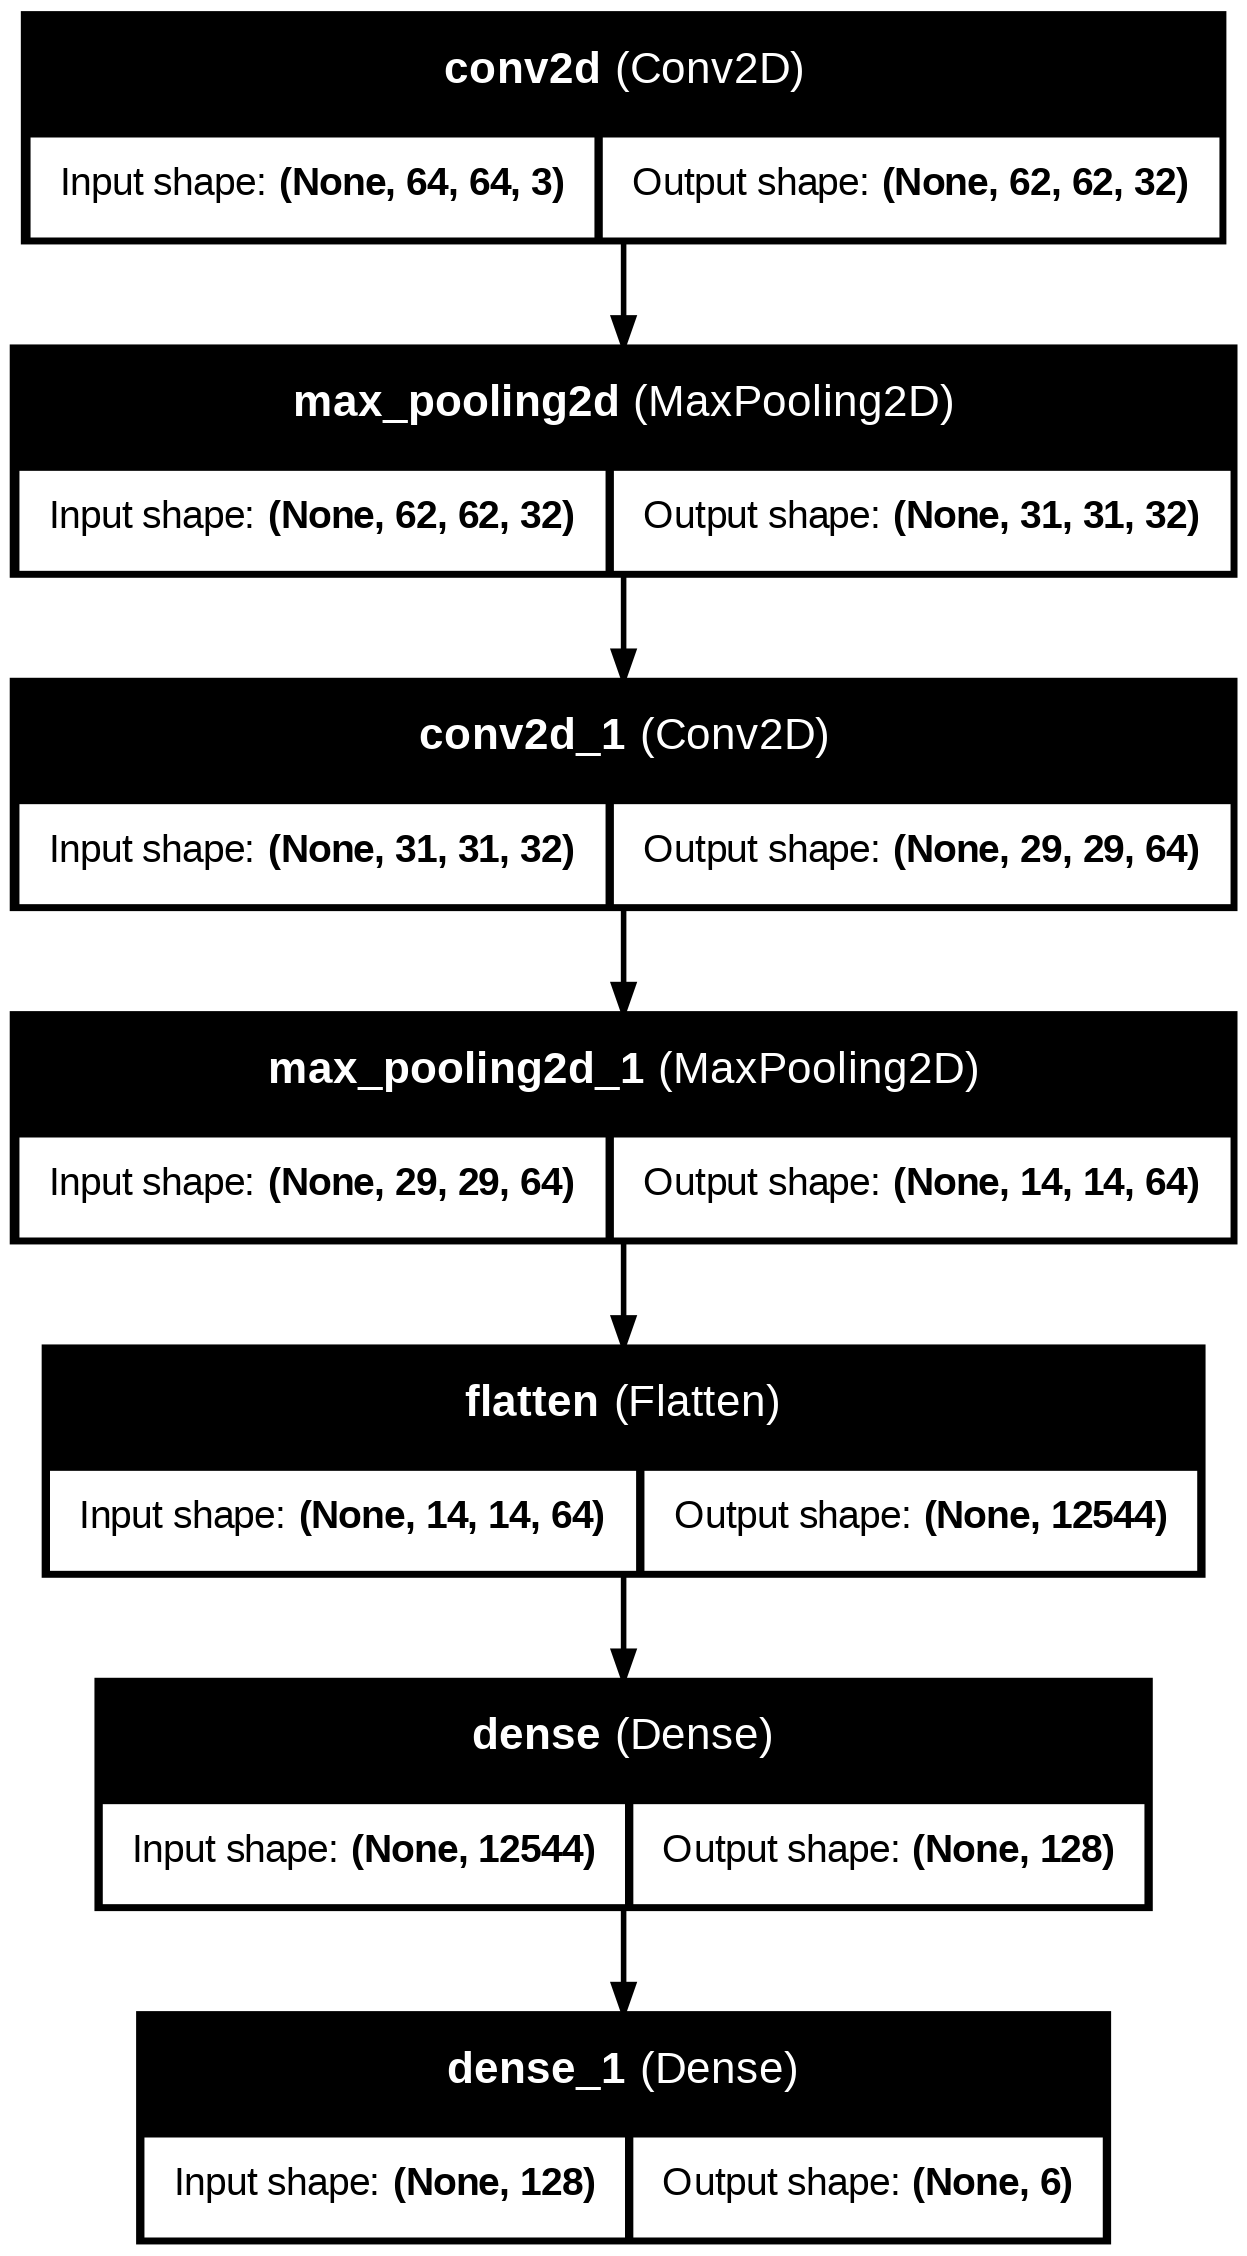

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='architecture.png', show_shapes=True, show_layer_names=True)

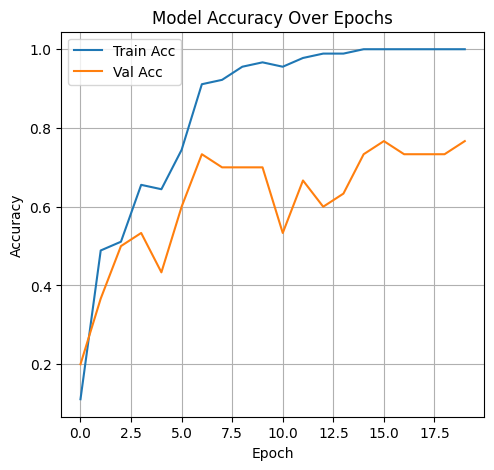

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

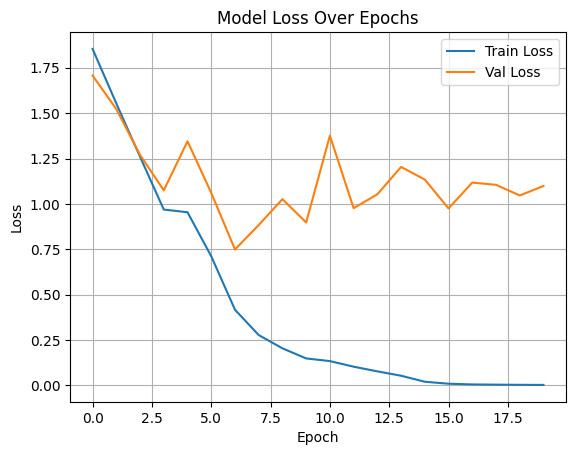

<Figure size 1200x500 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.figure(figsize=(12,5))
plt.tight_layout()
plt.show()

In [19]:
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
print("\nClassification Report:\n")
print(classification_report(test_set.classes, y_pred, target_names=list(test_set.class_indices.keys())))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step

Classification Report:

              precision    recall  f1-score   support

        acai       0.62      1.00      0.77         5
     cupuacu       0.80      0.80      0.80         5
    graviola       0.67      0.80      0.73         5
     guarana       0.83      1.00      0.91         5
     pupunha       1.00      0.60      0.75         5
      tucuma       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.82      0.77      0.75        30
weighted avg       0.82      0.77      0.75        30

